# NumPy 回顾
- 和MATLAB不同，* 是元素逐个相乘，而不是矩阵乘法。在Numpy中使用dot来进行矩阵乘法

In [4]:
import numpy as np

In [12]:
x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6], [7, 8]])

v = np.array([9, 10])
w = np.array([11, 12])

In [16]:
# 每个元素单独相乘
x * y

array([[ 5, 12],
       [21, 32]])

In [18]:
# 矩阵乘法
x.dot(y)

array([[19, 22],
       [43, 50]])

In [19]:
np.dot(x, y)

array([[19, 22],
       [43, 50]])

In [20]:
np.dot(x, v)

array([29, 67])

In [21]:
np.dot(v, x)

array([39, 58])

In [22]:
np.dot(v, w)

219

In [23]:
w.dot(v)

219

In [29]:
np.array([1.2, 2, 3]).dtype


dtype('float64')

In [37]:
a = np.eye(4)
print(a)
print(np.linalg.inv(a))


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


# jupyter 小部件

In [1]:
widgets.ColorPicker(
 concise=False,
 description='Pick a color',
 value='blue',
 disabled=False
)

NameError: name 'widgets' is not defined

In [3]:
from ipywidgets import interact
import ipywidgets as widgets

In [4]:
def f(x):
 return x
# Generate a slider 
interact(f, x=10,);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [5]:
interact(f, x=True)

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

In [6]:
interact(f, x='Hi there')

interactive(children=(Text(value='Hi there', description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

In [7]:
 play = widgets.Play(
  # interval=10,
  value=50,
 min=0,
 max=100,
 step=1,
 description="Press play",
 disabled=False
)
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])

In [8]:
widgets.DatePicker(
 description='Pick a Date',
 disabled=False
)

DatePicker(value=None, description='Pick a Date')

In [9]:
widgets.ColorPicker(
 concise=False,
 description='Pick a color',
 value='blue',
 disabled=False
)

ColorPicker(value='blue', description='Pick a color')

In [11]:
tab_contents = ['P0', 'P1', 'P2', 'P3', 'P4']
children = [widgets.Text(description=name) for name in tab_contents]
tab = widgets.Tab()
tab.children = children
for i in range(len(children)):
 tab.set_title(i, str(i))
tab

In [13]:
#Note that http urls will not be displayed. Only https are allowed inside the Iframe
from IPython.display import IFrame
IFrame('https://arctee.cn/', width=800, height=450)

In [20]:
from IPython.display import IFrame
IFrame("https://arctee.cn/")

TypeError: __init__() missing 2 required positional arguments: 'width' and 'height'

In [33]:
from IPython.display import IFrame
IFrame("https://pan.arctee.cn", width=800, height=450)

# kNN 算法

## 准备：构造简单数据集

In [57]:
# 导入库
import numpy as np
import matplotlib.pyplot as plt
import operator

In [59]:
# 自建简单数据集
def createDataSet():
    groups = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return groups, labels

In [61]:
# 输出检验数据是否定义正确
groups, labels = createDataSet()
print(groups, labels)

[[1.  1.1]
 [1.  1. ]
 [0.  0. ]
 [0.  0.1]] ['A', 'A', 'B', 'B']


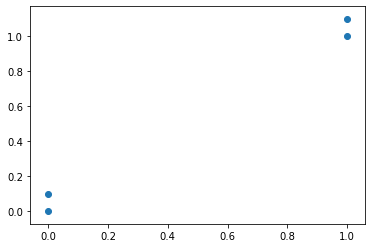

In [68]:
# 数据可视化
x = groups[:, 0]
y = groups[:, 1]

plt.scatter(x, y)
plt.show()

## 实施 kNN 算法

In [111]:
# kNN 算法实现 
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    sortedDistIndices = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndices[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
        sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1),
                                  reverse=True)
    return sortedClassCount[0][0]

In [114]:
# 检验
classify0([10,10], groups, labels, 3)

'A'